In [58]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityRide = pd.merge(ride, city, on="city")
print(f'city: {len(city)} ride: {len(ride)} merged:{len(cityRide)}')

# Display the data table for preview
cityRide.head()

city: 120 ride: 2375 merged:2375


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

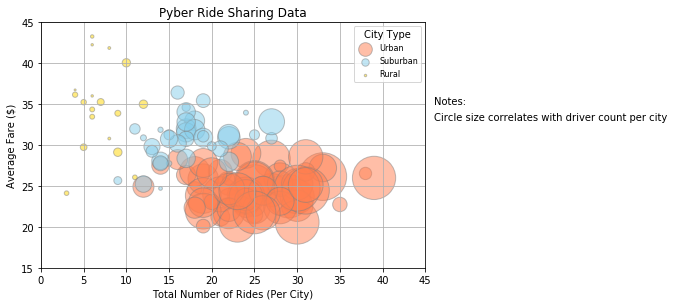

In [59]:
# clean data
cityDriveCnt = cityRide.groupby(['city', 'type'])
cityDriveData = pd.DataFrame(cityDriveCnt['city', 'type'].size())
cityDriveData['driver_count']= cityDriveCnt['driver_count'].sum()
cityDriveData["Count of Rides"] = cityDriveCnt['ride_id'].count()
cityDriveData["Fare"] = cityDriveCnt['fare'].sum()
cityDriveData["Avg Fare"] = cityDriveData['Fare']/cityDriveData['Count of Rides']
cityDriveDf = cityDriveData.reset_index()
#cityDriveDf.head()


# Obtain the x and y coordinates for each of the three city types
cityOne = cityDriveDf[cityDriveDf["type"] == cityDriveDf["type"].unique()[0]]
cityTwo = cityDriveDf[cityDriveDf["type"] == cityDriveDf["type"].unique()[1]]
cityThree = cityDriveDf[cityDriveDf["type"] == cityDriveDf["type"].unique()[2]]
colors = ("Coral","SkyBlue", "Gold")
groups = cityDriveDf["type"].unique()


# Build the scatter plots for each city types

plt.scatter(cityOne["Count of Rides"], cityOne["Avg Fare"], marker="o", 
            color=colors[0] ,s=cityOne["driver_count"],label=groups[0],alpha=0.5, edgecolors ='Gray',linewidths = None)

plt.scatter(cityTwo["Count of Rides"], cityTwo["Avg Fare"], marker="o", 
            color=colors[1] ,s=cityTwo["driver_count"],label=groups[1],alpha=0.5 ,edgecolors ='Gray',linewidths = None )

plt.scatter(cityThree["Count of Rides"], cityThree["Avg Fare"], marker="o", 
            color=colors[2] ,s=cityThree["driver_count"],label=groups[2],alpha=0.5,edgecolors ='Gray' ,linewidths = None )

# Incorporate the other graph properties

plt.grid()
plt.legend(loc=1, scatterpoints=1, ncol=1, fontsize=8, title ="City Type", markerscale=0.4)
plt.xlim(0, 45)
plt.ylim(15, 45)
plt.tight_layout()

# Create a legend

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(46, 35, "Notes:")
plt.text(46, 33, "Circle size correlates with driver count per city")

# Save Figure
#fig.savefig('temp.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.savefig("data/PyberHW.png", pad_inches = 3, bbox_inches='tight')

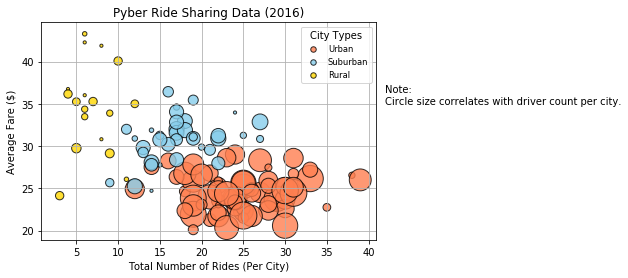

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

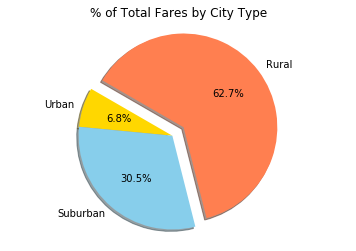

In [60]:
# Calculate Type Percents
typeGroup = cityRide.groupby(['type'])
typeDf = pd.DataFrame(typeGroup['fare'].sum())
typeDf["totalFare"] = cityRide['fare'].sum()
typeDf["Percent"] = typeDf["fare"]/typeDf["totalFare"]
citytypeDf = typeDf.reset_index()


# Build Pie Chart
cityType = citytypeDf["type"]
typePercent = citytypeDf["Percent"]
colorsPie = ("Gold","SkyBlue", "Coral")
groupsPie = cityDriveDf["type"].unique()
explode = (0, 0, 0.15)
plt.title("% of Total Fares by City Type")
plt.pie(typePercent, explode=explode, labels=groupsPie, colors=colorsPie,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")


# Save Figure
plt.savefig("data/PyberHWPie.png",  bbox_inches='tight')

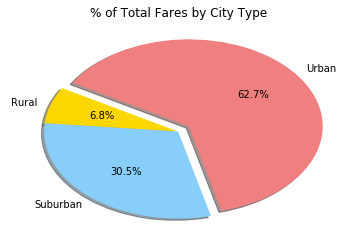

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

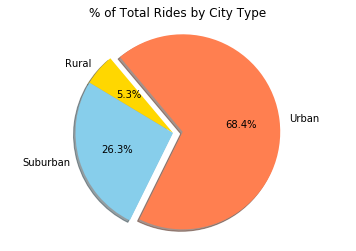

In [61]:
# Calculate Ride Percents
RideDf = pd.DataFrame(typeGroup['ride_id'].size())
RideDf["totalRide"] =len(cityRide)
RidetypeDf = RideDf.reset_index()
RidetypeDf["Percent"] = RidetypeDf["ride_id"]/RidetypeDf["totalRide"]

# Build Pie Chart
rideType = RidetypeDf["type"]
ridePercent = RidetypeDf["Percent"]
colorsPie = ("Gold","SkyBlue", "Coral")
explode = (0, 0, 0.10)
plt.title("% of Total Rides by City Type")
plt.pie(ridePercent, explode=explode, labels=rideType, colors=colorsPie,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.axis("equal")


# Save Figure
plt.savefig("data/PyberHWPie2.png",  bbox_inches='tight')

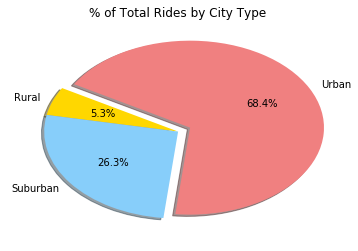

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

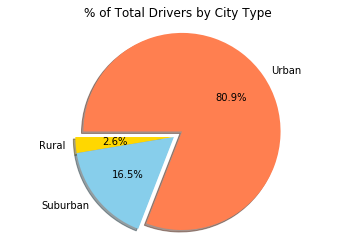

In [62]:
# Calculate Driver Percents
DriverGrp = city.groupby(['type'])
DriversDf = pd.DataFrame(DriverGrp['driver_count'].sum().reset_index())
DriversDf["totalDriver"] =city['driver_count'].sum()
DriversDf["Percent"] = DriversDf["driver_count"]/DriversDf["totalDriver"]

# Build Pie Charts
driverType = DriversDf["type"]
ridePercent = DriversDf["Percent"]
colorsPie = ("Gold","SkyBlue", "Coral")
explode = (0, 0, 0.10)
plt.title("% of Total Drivers by City Type")
plt.pie(ridePercent, explode=explode, labels=driverType, colors=colorsPie,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")


# Save Figure
plt.savefig("data/PyberHWPie3.png",  bbox_inches='tight')


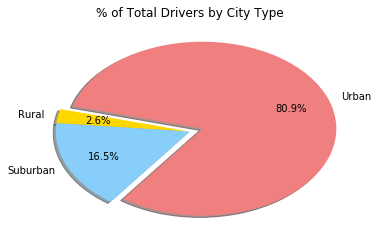

In [6]:
# Show Figure
plt.show()